Какую форму $ r(x) $ должна иметь колонна, имеющая круглое поперечное сечение, чтобы в каждом её горизонтальном сечении действовало одно и тоже давление. Во внимание необходимо принять, что давление создается как весом самой колонны, так и некоторой постоянной нагрузкой $ F $, приложенной сверху колонны. Радиус колонны на ее верху равен $ r_0 $. Плотность материала колонны равна $ \rho $. 
$$$$
*Пояснение:*
$$$$
В любом сечении колонны должно быть одинаковое давление $$ k = \frac{F}{\pi r_0^2} ,$$ т.е. должно выполняться $$ k \bullet r(z)^2 \pi = F + Q(z) ,$$ где $ Q $ -- вес колонны.
$$$$
Дифференцируя это выражение получим $$ dQ = 2k \bullet r\pi \bullet dr .$$ Учитывая, что $$ dQ = r^2 \pi \bullet\rho g dz ,$$ получим $$ \frac{dr}{dz} = \frac{\rho \bullet r g}{2k} .$$ Добавляя начальное условие $ r(0) = r_0 $, можно решить задачу Коши. Точное решение имеет вид $$ r(z) = r_0 exp(\frac{\rho \bullet z g}{2k}) .$$

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from numpy import arange
from math import exp
from math import pi

In [2]:
def euler_method(function, x_list, y_0, n):
    h = (x_list[-1] - x_list[0])/n
    new_x = arange(x_list[0], x_list[-1] + h, h)
    new_y = [y_0]
    for i in range(1, len(new_x)):
        new_y.append( new_y[i - 1] + h * function(new_x[i - 1], new_y[i - 1]) )
    return (new_x, new_y)

def euler_method_recal(function, x_list, y_0, n):
    h = (x_list[-1] - x_list[0])/n
    new_x = arange(x_list[0], x_list[-1] + h, h)
    new_y = [y_0]
    for i in range(1, len(new_x)):
        new_y.append(new_y[i - 1] + h * (function(new_x[i - 1], new_y[i - 1]) 
                                         + function(new_x[i], new_y[i - 1] + h * function(new_x[i - 1], new_y[i - 1])))/2)
    return (new_x, new_y)

def runge_kutta_4(function, x_list, y_0, n):
    h = (x_list[-1] - x_list[0])/n
    new_x = arange(x_list[0], x_list[-1] + h, h)
    new_y = [y_0]
    for i in range(1, len(new_x)):
        k_1 = function(new_x[i - 1], new_y[i - 1])
        k_2 = function(new_x[i - 1] + h/2, new_y[i - 1] + k_1 * h/2)
        k_3 = function(new_x[i - 1] + h/2, new_y[i - 1] + k_2 * h/2)
        k_4 = function(new_x[i - 1] + h, new_y[i - 1] + k_3 * h)
        new_y.append(new_y[i - 1] + h * (k_1 + 2 * k_2 + 2 * k_3 + k_4)/6)  
    return (new_x, new_y)

In [3]:
r_0 = 0.5
F = 2.5e4
g = 9.81
k = F/(pi * r_0 ** 2)
ro = 2700

f = lambda x, y : y * ro * g/(2 * k) + 0 * x

start, end, h, n = 0, 5, 0.1, 10

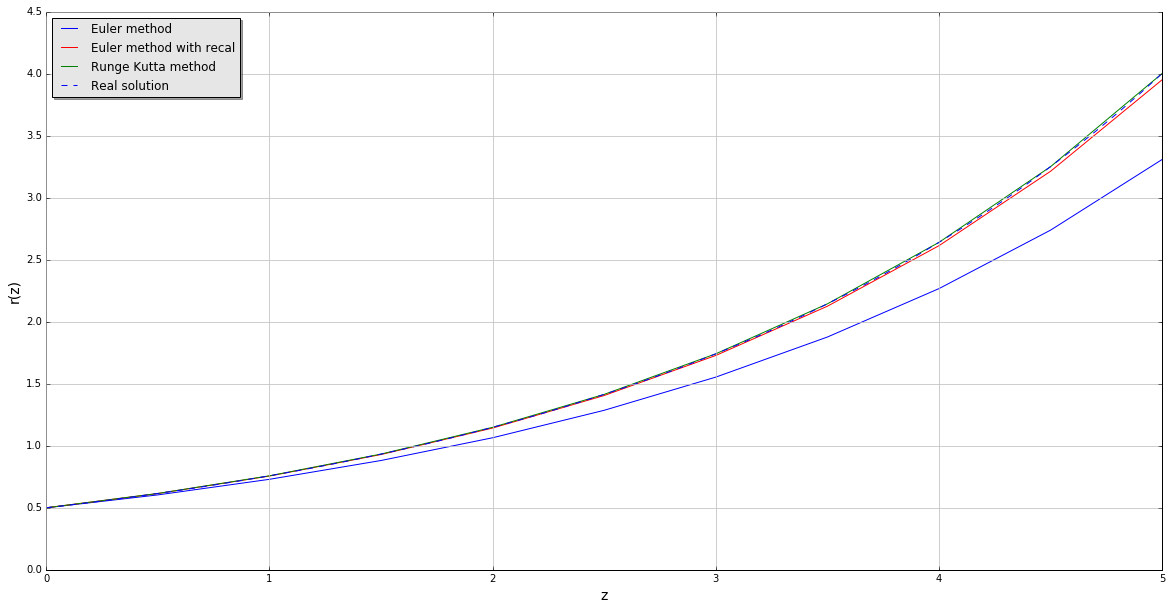

In [4]:
fig, ax = plt.subplots(figsize=(20,10))

xs, ys = euler_method(f, arange(start, end + h, h), r_0, n)
ax.plot(xs, ys, '-b',label = 'Euler method')

xs, ys = euler_method_recal(f, arange(start, end + h, h), r_0, n)
ax.plot(xs, ys, '-r',label = 'Euler method with recal')

xs, ys = runge_kutta_4(f, arange(start, end + h, h), r_0, n)
ax.plot(xs, ys, '-g',label = 'Runge Kutta method')

xs = arange(start, end + h, h)
ys = [r_0 * exp(ro * g * x/(2 * k)) for x in xs]
ax.plot(xs, ys, '--',label = 'Real solution')

plt.xlabel('z', fontsize = 14)
plt.ylabel('r(z)', fontsize = 14)

ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(1))

ax.axhline(0, color = 'black')
ax.axvline(0, color = 'black')

ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')
ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')

legend = ax.legend(loc = 'upper left', shadow = True)

frame = legend.get_frame()
frame.set_facecolor('0.90')

plt.show()

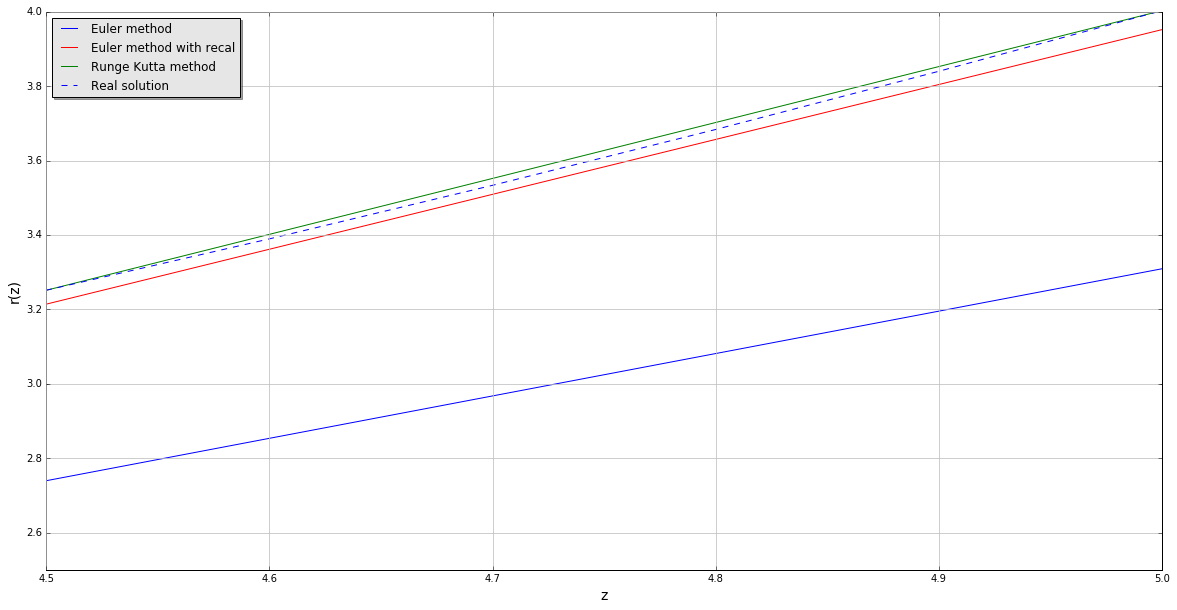

In [5]:
fig, ax = plt.subplots(figsize=(20,10))

xs, ys = euler_method(f, arange(start, end + h, h), r_0, n)
ax.plot(xs, ys, '-b',label = 'Euler method')

xs, ys = euler_method_recal(f, arange(start, end + h, h), r_0, n)
ax.plot(xs, ys, '-r',label = 'Euler method with recal')

xs, ys = runge_kutta_4(f, arange(start, end + h, h), r_0, n)
ax.plot(xs, ys, '-g',label = 'Runge Kutta method')

xs = arange(start, end + h, h)
ys = [r_0 * exp(ro * g * x/(2 * k)) for x in xs]
ax.plot(xs, ys, '--',label = 'Real solution')

plt.xlim(4.5, 5)
plt.ylim(2.5, 4)

plt.xlabel('z', fontsize = 14)
plt.ylabel('r(z)', fontsize = 14)

ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(1))

ax.axhline(0, color = 'black')
ax.axvline(0, color = 'black')

ax.grid(which='major', axis='x', linewidth=0.75, linestyle='-', color='0.75')
ax.grid(which='major', axis='y', linewidth=0.75, linestyle='-', color='0.75')

legend = ax.legend(loc = 'upper left', shadow = True)

frame = legend.get_frame()
frame.set_facecolor('0.90')

plt.show()